In [13]:
import cv2  # opencv 的三个通道的颜色为 BGR
import numpy as np
from IPython import display

In [30]:
def cv2_show(img: np.array, name: str = 'img'):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 图片-读取
可以三通道和灰度图

In [15]:
img = cv2.imread("../../../data/OpenCV-img/opencv_logo.jpg")
type(img)

numpy.ndarray

In [16]:
img.shape  # 大小为 h（高）, w（宽）, c（通道）

(250, 250, 3)

In [17]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

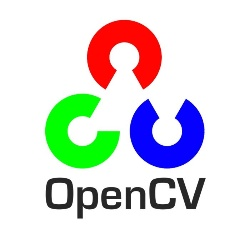

In [24]:
display.Image("../../../data/OpenCV-img/opencv_logo.jpg")

In [19]:
# 我们还可以指定参数，来读取为灰度图
img_gray = cv2.imread("../../../data/OpenCV-img/opencv_logo.jpg", cv2.IMREAD_GRAYSCALE)

In [12]:
img_gray.shape  # 没有 channel 了

(250, 250)

In [ ]:
display.Image('i')

## 图片-保存

In [14]:
cv2.imwrite('gray_opencv_logo.jpg', img_gray)

True

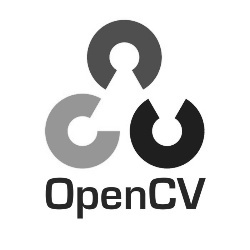

In [10]:
display.Image('gray_opencv_logo.jpg')

## 视频-读取
可以控制摄像头，视频的话就指定路径就行

In [20]:
vc = cv2.VideoCapture('../../../data/OpenCV-video/traffic.mp4')

In [21]:
# 检测是否能打开图片
if vc.isOpened():
    isOpen, frame = vc.read()
else:
    isOpen = False

In [22]:
while isOpen:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(10) & 0xFF == 27:
            break

vc.release()
cv2.destroyAllWindows()

## 截取部分图像数据

In [5]:
img = cv2.imread("../../../data/OpenCV-img/opencv_logo.jpg")
logo = img[0:100, 0:100]
cv2.imwrite('partial_opencv_logo.jpg', logo)

True

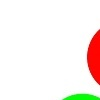

In [12]:
display.Image("partial_opencv_logo.jpg")

## 颜色通道提取

In [21]:
b, g, r = cv2.split(img)

In [22]:
b.shape

(250, 250)

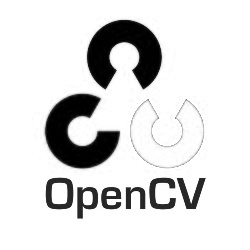

In [34]:
cv2.imwrite('b_opencv_logo_split.jpg', b)
display.Image('b_opencv_logo_split.jpg')

In [31]:
# 颜色通道合并
img_merge = cv2.merge((b, g, r))
cv2_show(img_merge)

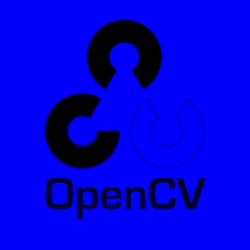

In [35]:
# 只提取一个通道（eg。保留B，这G与R均为零）
cur_img = img.copy()
cur_img[:, :, 1] = 0
cur_img[:,:,2]=0
# cv2_show(cur_img)
cv2.imwrite('base_opencv_logo.jpg', cur_img)
display.Image('base_opencv_logo.jpg')

## 边界填充

In [39]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

img = cv2.imread("../../../data/OpenCV-img/mountain.png")

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)

Text(0.5, 1.0, 'CONSTANT')

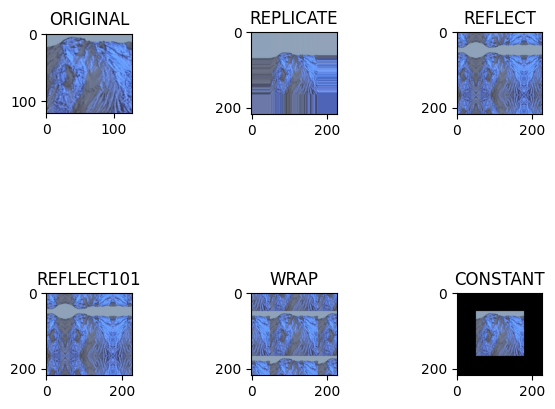

In [40]:
import matplotlib.pyplot as plt

plt.subplot(3, 5, 1)
plt.imshow(img, 'gray')
plt.title('ORIGINAL')

plt.subplot(3, 5, 3)
plt.imshow(replicate, 'gray')
plt.title('REPLICATE')

plt.subplot(3, 5, 5)
plt.imshow(reflect, 'gray')
plt.title('REFLECT')

plt.subplot(3, 5, 11)
plt.imshow(reflect101, 'gray')
plt.title('REFLECT101')

plt.subplot(3, 5, 13)
plt.imshow(wrap, 'gray')
plt.title('WRAP')

plt.subplot(3, 5, 15)
plt.imshow(constant, 'gray')
plt.title('CONSTANT')

## 数值计算

(118, 127, 3)


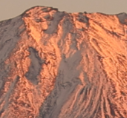

In [44]:
print(img.shape)
display.Image("../../../data/OpenCV-img/mountain.png")

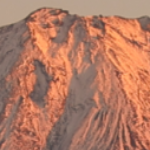

In [43]:
res = cv2.resize(img, (150, 150))
cv2.imwrite("resize_150_150_mountain.png", res)
display.Image("resize_150_150_mountain.png")

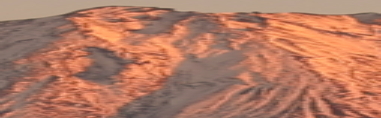

In [46]:
# 不指定具体的长度但是给出比例
res = cv2.resize(img, (0,0), fx=3, fy=1)
cv2.imwrite("resize_1x3_mountain.png", res)
display.Image("resize_1x3_mountain.png")